In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functools as fc

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "https://www.basketball-reference.com/players/j/jamesle01.html"
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, 'html.parser')

In [5]:
title = soup.title
print(title)

<title>LeBron James Stats | Basketball-Reference.com</title>


In [6]:
concat_class = []
webpage_links = soup.findAll(True, {'class':['titleColumn']})
#print(webpage_links[5])
import re
clean = re.compile('".*"')
for i in range(0, len(webpage_links), 3):
    str_cells_1 = str(webpage_links[i])
    cleantext1 = BeautifulSoup(str_cells_1, "html.parser").get_text()
    str_cells_2 = str(webpage_links[i+1])
    cleantext2 = BeautifulSoup(str_cells_2, "html.parser").find_all('strong')
    #print(cleantext2)
    str_cells_3 = str(cleantext2)
    cleantext3 =re.search(clean, str_cells_3).group(0)
    #print("ppoo", cleantext3)
    
    concat_class.append([str(cleantext1) + str(cleantext3)])
    #concat_class.append([webpage_links[i], webpage_links[i+1]])

    

In [7]:
import re
webpage_links = soup.find_all('tr', {'id': re.compile(r'per.game.*')})


In [8]:
type(webpage_links)

bs4.element.ResultSet

In [9]:
import re
list_rows = []
labels = []
for row in webpage_links:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
    print(clean2)

[19, CLE, NBA, SG, 79, 79, 39.5, 7.9, 18.9, .417, 0.8, 2.7, .290, 7.1, 16.1, .438, .438, 4.4, 5.8, .754, 1.3, 4.2, 5.5, 5.9, 1.6, 0.7, 3.5, 1.9, 20.9]
[20, CLE, NBA, SF, 80, 80, 42.4, 9.9, 21.1, .472, 1.4, 3.9, .351, 8.6, 17.2, .499, .504, 6.0, 8.0, .750, 1.4, 6.0, 7.4, 7.2, 2.2, 0.7, 3.3, 1.8, 27.2]
[21, CLE, NBA, SF, 79, 79, 42.5, 11.1, 23.1, .480, 1.6, 4.8, .335, 9.5, 18.3, .518, .515, 7.6, 10.3, .738, 0.9, 6.1, 7.0, 6.6, 1.6, 0.8, 3.3, 2.3, 31.4]
[22, CLE, NBA, SF, 78, 78, 40.9, 9.9, 20.8, .476, 1.3, 4.0, .319, 8.6, 16.8, .513, .507, 6.3, 9.0, .698, 1.1, 5.7, 6.7, 6.0, 1.6, 0.7, 3.2, 2.2, 27.3]
[23, CLE, NBA, SF, 75, 74, 40.4, 10.6, 21.9, .484, 1.5, 4.8, .315, 9.1, 17.1, .531, .518, 7.3, 10.3, .712, 1.8, 6.1, 7.9, 7.2, 1.8, 1.1, 3.4, 2.2, 30.0]
[24, CLE, NBA, SF, 81, 81, 37.7, 9.7, 19.9, .489, 1.6, 4.7, .344, 8.1, 15.2, .535, .530, 7.3, 9.4, .780, 1.3, 6.3, 7.6, 7.2, 1.7, 1.1, 3.0, 1.7, 28.4]
[25, CLE, NBA, SF, 76, 76, 39.0, 10.1, 20.1, .503, 1.7, 5.1, .333, 8.4, 15.0, .560, .545, 

labels = webpage_links[0].find_all('td', {'data-stat': re.compile(r'.*')})
all_header = []
str_labels = str(labels)
cleantext2 = BeautifulSoup(str_labels, "lxml").get()
print(cleantext2)

In [10]:
labels = [['Age', 'Team', 'League', 'Position', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
labels_df = pd.DataFrame(labels)
labels_df.head()


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,Age,Team,League,Position,GP,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [11]:
df = pd.DataFrame(list_rows)
df1 = df[0].str.split(',', expand=True)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,[19,CLE,NBA,SG,79,79,39.5,7.9,18.9,.417,...,.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9]
1,[20,CLE,NBA,SF,80,80,42.4,9.9,21.1,.472,...,.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2]
2,[21,CLE,NBA,SF,79,79,42.5,11.1,23.1,.480,...,.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4]
3,[22,CLE,NBA,SF,78,78,40.9,9.9,20.8,.476,...,.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3]
4,[23,CLE,NBA,SF,75,74,40.4,10.6,21.9,.484,...,.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0]


# Finally, Data!

In [12]:
data_frames = [labels_df, df1]
df4 = pd.concat(data_frames)
df5 = df4.rename(columns=df4.iloc[0].str.strip())
df6 = df5[df5.MP != 'MP']

df6['Age'] = (df6['Age'].str.strip('['))
df6['PTS'] = (df6['PTS'].str.strip(']'))
df6['AST'] = df6['AST'].astype(float)

df6 = df6.apply(fc.partial(pd.to_numeric, errors='ignore'))


df6.head()

,Age,Team,League,Position,GP,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,19,CLE,NBA,SG,79,79,39.5,7.9,18.9,0.417,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,20,CLE,NBA,SF,80,80,42.4,9.9,21.1,0.472,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,21,CLE,NBA,SF,79,79,42.5,11.1,23.1,0.480,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,22,CLE,NBA,SF,78,78,40.9,9.9,20.8,0.476,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,23,CLE,NBA,SF,75,74,40.4,10.6,21.9,0.484,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0


# Time to graph some stuff

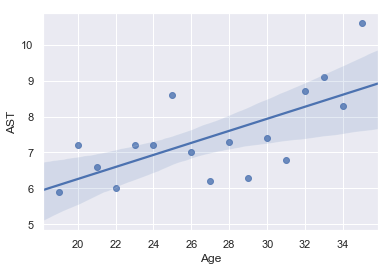

In [23]:
sns.regplot(x='Age', y='AST', data=df6);

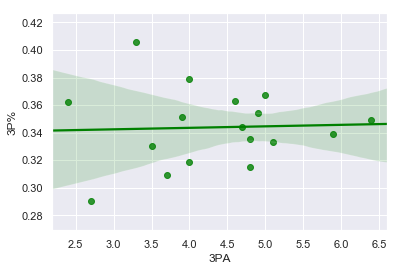

In [14]:
sns.regplot(x='3PA', y='3P%', data=df6, color="green")

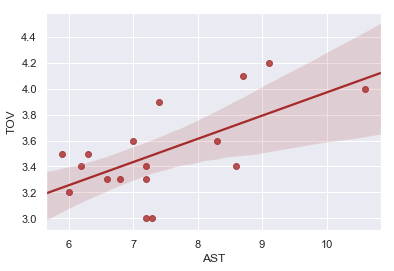

In [15]:
sns.regplot(x='AST', y='TOV', data=df6, color="brown")

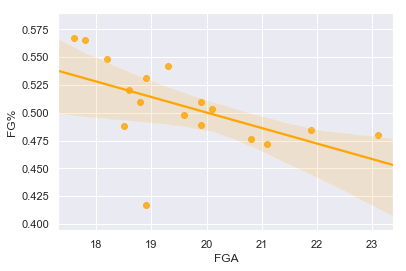

In [17]:
sns.regplot(x='FGA', y='FG%', data=df6, color="orange")